# Prediction of Accident Severity using Machine Learning


In [1]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [1]:
#import files
accident_ds=pd.read_csv("dft-road-casualty-statistics-collision-2022.csv")
vehicle_ds=pd.read_csv("dft-road-casualty-statistics-vehicle-2022.csv")
dft-road-casualty-statistics-casualty-2022.csv
casuality_ds= pd.read_csv("dft-road-casualty-statistics-casualty-2022.csv")

In [3]:
accident_ds.columns


Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [4]:
#Deleting the column with -1 value.
accident_ds_drop = accident_ds.drop('local_authority_district',axis=1)
accident_ds_drop.shape

(106004, 35)

In [5]:
#Replacing other  -1 with NA
cleaned_accident= accident_ds_drop.applymap(lambda x: pd.NA if x == -1 else x)
cleaned_accident


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2022010352073,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001883
1,2022010352573,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,...,4,4,1,1,0,0,2,1,2,E01033745
2,2022010352575,2022,10352575,551119.0,174789.0,0.173482,51.451924,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000378
3,2022010352578,2022,10352578,528889.0,192230.0,-0.139873,51.614153,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001529
4,2022010352580,2022,10352580,539773.0,190404.0,0.016495,51.595151,1,3,4,...,0,4,1,1,0,0,1,1,2,E01003673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105999,2022991311627,2022,991311627,235016.0,625551.0,-4.613246,55.495815,99,2,1,...,1,1,1,1,0,0,1,2,<NA>,-1
106000,2022991312498,2022,991312498,127459.0,663067.0,-6.348650,55.783849,99,2,3,...,0,6,1,1,0,0,2,1,<NA>,-1
106001,2022991315177,2022,991315177,254396.0,663549.0,-4.326930,55.843114,99,3,1,...,5,1,1,1,0,0,1,2,<NA>,-1
106002,2022991321308,2022,991321308,325409.0,677054.0,-3.196963,55.980648,99,2,1,...,8,4,1,1,0,0,1,1,<NA>,-1


In [6]:
# replace "-1" with np.NaN in string coloum.loc[:, "lsoa_of_accident_location"] = accident_ds["lsoa_of_accident_location"].replace('-1', np.NA)
# replace "-1" with np.NaN in string coloumn
# replace "-1" with np.NaN in string coloumn
cleaned_accident.loc[:, "lsoa_of_accident_location"] = cleaned_accident["lsoa_of_accident_location"].replace('-1', np.NaN)

cleaned_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2022010352073,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001883
1,2022010352573,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,...,4,4,1,1,0,0,2,1,2,E01033745
2,2022010352575,2022,10352575,551119.0,174789.0,0.173482,51.451924,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000378
3,2022010352578,2022,10352578,528889.0,192230.0,-0.139873,51.614153,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001529
4,2022010352580,2022,10352580,539773.0,190404.0,0.016495,51.595151,1,3,4,...,0,4,1,1,0,0,1,1,2,E01003673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105999,2022991311627,2022,991311627,235016.0,625551.0,-4.613246,55.495815,99,2,1,...,1,1,1,1,0,0,1,2,NaN,NaN
106000,2022991312498,2022,991312498,127459.0,663067.0,-6.348650,55.783849,99,2,3,...,0,6,1,1,0,0,2,1,NaN,NaN
106001,2022991315177,2022,991315177,254396.0,663549.0,-4.326930,55.843114,99,3,1,...,5,1,1,1,0,0,1,2,NaN,NaN
106002,2022991321308,2022,991321308,325409.0,677054.0,-3.196963,55.980648,99,2,1,...,8,4,1,1,0,0,1,1,NaN,NaN


In [7]:
## all datas with -1 is either out of rangs or missing information.So I have deleted all rows and coloumns with -1.

cleaned_accident.dropna(inplace=True)

In [8]:
cleaned_accident# Data cleaning with -1 values

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2022010352073,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001883
1,2022010352573,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,...,4,4,1,1,0,0,2,1,2,E01033745
2,2022010352575,2022,10352575,551119.0,174789.0,0.173482,51.451924,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000378
4,2022010352580,2022,10352580,539773.0,190404.0,0.016495,51.595151,1,3,4,...,0,4,1,1,0,0,1,1,2,E01003673
5,2022010352588,2022,10352588,543159.0,181261.0,0.061626,51.512146,1,2,1,...,0,4,8,1,0,0,1,1,2,E01003481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98557,2022552300304,2022,552300304,406793.0,92078.0,-1.905120,50.728285,55,3,2,...,0,1,2,2,0,0,1,2,2,E01015389
98558,2022552300305,2022,552300305,381457.0,116270.0,-2.265316,50.945567,55,3,2,...,0,1,1,1,0,0,2,1,2,E01020459
98559,2022552300306,2022,552300306,405618.0,94421.0,-1.921733,50.749367,55,3,2,...,0,4,2,2,0,0,1,2,2,E01015381
98560,2022552300307,2022,552300307,403682.0,93263.0,-1.949186,50.738968,55,2,2,...,0,4,1,1,0,0,1,1,2,E01015439


In [9]:
# Data cleaning in vehicle table.
cleaned_vehicle= vehicle_ds.applymap(lambda x: pd.NA if x == -1 else x)
cleaned_vehicle[50:70]

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
50,2022010352627,2022,10352627,2,9,0,18,3,7,0,...,1,22,5,2993,2,2,BMW 5 SERIES,4,1,E01003937
51,2022010352627,2022,10352627,3,9,0,18,3,7,0,...,2,22,5,<NA>,<NA>,<NA>,-1,4,1,E01003937
52,2022010352629,2022,10352629,1,9,0,9,7,4,0,...,1,42,7,2967,2,7,VOLKSWAGEN TOUAREG,2,1,E01003337
53,2022010352629,2022,10352629,2,3,0,18,5,1,0,...,1,32,6,125,1,3,HONDA SH 125,4,1,E01003212
54,2022010352631,2022,10352631,1,3,0,18,1,5,0,...,1,32,6,125,1,4,YAMAHA GPD,3,1,E01003143
55,2022010352631,2022,10352631,2,9,0,15,1,5,0,...,1,30,6,1395,8,6,VOLKSWAGEN GOLF,<NA>,<NA>,-1
56,2022010352635,2022,10352635,1,8,0,18,8,4,0,...,1,47,8,998,1,8,FORD FOCUS,3,1,E01000022
57,2022010352637,2022,10352637,1,9,0,16,3,7,0,...,1,51,8,1950,2,3,MERCEDES VITO,3,1,E01003280
58,2022010352637,2022,10352637,2,9,0,5,0,7,2,...,2,57,9,1991,8,2,MERCEDES GLC CLASS,2,1,E01003258
59,2022010352641,2022,10352641,1,9,0,18,3,7,0,...,1,35,6,1995,2,4,BMW 5 SERIES,3,1,E01002057


In [10]:
cleaned_vehicle.loc[:, "generic_make_model"] = cleaned_vehicle["generic_make_model"].replace('-1', np.NaN)

cleaned_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022010352073,2022,10352073,1,19,0,9,3,8,0,...,1,48,8,1461,2,4,RENAULT KANGOO,7,1,E01002687
1,2022010352073,2022,10352073,2,3,0,18,1,5,0,...,1,17,4,125,1,1,HONDA FSH125,1,1,E01001364
2,2022010352573,2022,10352573,1,9,0,18,7,3,0,...,2,42,7,<NA>,<NA>,<NA>,NaN,5,1,E01000338
3,2022010352573,2022,10352573,2,9,0,13,7,3,0,...,3,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,-1
4,2022010352575,2022,10352575,1,9,0,18,4,8,0,...,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1,E01000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193540,2022991312498,2022,991312498,2,19,0,18,8,1,0,...,1,43,7,1968,2,0,VOLKSWAGEN CRAFTER,6,3,-1
193541,2022991312498,2022,991312498,3,9,0,2,8,1,0,...,1,62,9,1229,1,12,VAUXHALL CORSA,6,3,-1
193542,2022991315177,2022,991315177,1,9,0,5,8,4,0,...,1,61,9,1497,8,10,TOYOTA YARIS,3,1,-1
193543,2022991321308,2022,991321308,1,9,0,18,3,7,0,...,1,77,11,1794,1,17,TOYOTA AVENSIS,10,1,-1


In [11]:
cleaned_vehicle.loc[:, "lsoa_of_driver"] = cleaned_vehicle["lsoa_of_driver"].replace('-1', np.NaN)

cleaned_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022010352073,2022,10352073,1,19,0,9,3,8,0,...,1,48,8,1461,2,4,RENAULT KANGOO,7,1,E01002687
1,2022010352073,2022,10352073,2,3,0,18,1,5,0,...,1,17,4,125,1,1,HONDA FSH125,1,1,E01001364
2,2022010352573,2022,10352573,1,9,0,18,7,3,0,...,2,42,7,<NA>,<NA>,<NA>,NaN,5,1,E01000338
3,2022010352573,2022,10352573,2,9,0,13,7,3,0,...,3,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN
4,2022010352575,2022,10352575,1,9,0,18,4,8,0,...,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1,E01000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193540,2022991312498,2022,991312498,2,19,0,18,8,1,0,...,1,43,7,1968,2,0,VOLKSWAGEN CRAFTER,6,3,NaN
193541,2022991312498,2022,991312498,3,9,0,2,8,1,0,...,1,62,9,1229,1,12,VAUXHALL CORSA,6,3,NaN
193542,2022991315177,2022,991315177,1,9,0,5,8,4,0,...,1,61,9,1497,8,10,TOYOTA YARIS,3,1,NaN
193543,2022991321308,2022,991321308,1,9,0,18,3,7,0,...,1,77,11,1794,1,17,TOYOTA AVENSIS,10,1,NaN


In [12]:
cleaned_vehicle.dropna(inplace=True)
cleaned_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022010352073,2022,10352073,1,19,0,9,3,8,0,...,1,48,8,1461,2,4,RENAULT KANGOO,7,1,E01002687
1,2022010352073,2022,10352073,2,3,0,18,1,5,0,...,1,17,4,125,1,1,HONDA FSH125,1,1,E01001364
4,2022010352575,2022,10352575,1,9,0,18,4,8,0,...,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1,E01000390
6,2022010352578,2022,10352578,1,9,0,4,1,5,0,...,1,46,8,2993,2,2,BMW 5 SERIES,3,1,E01004666
8,2022010352580,2022,10352580,1,9,0,18,3,7,0,...,2,54,8,1498,1,14,MERCEDES A CLASS,3,1,E01003733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193313,2022991256732,2022,991256732,1,9,0,17,2,7,0,...,2,65,9,1580,8,3,HYUNDAI IONIQ,8,2,E01015628
193341,2022991257233,2022,991257233,1,9,0,8,5,1,0,...,2,63,9,1368,1,14,FIAT PUNTO,4,3,E01019276
193364,2022991257511,2022,991257511,1,9,0,16,8,3,0,...,1,58,9,2191,2,7,MAZDA CX-5,7,3,E01025585
193433,2022991258476,2022,991258476,1,9,0,18,5,1,0,...,1,21,5,1229,1,9,VAUXHALL CORSA,1,1,E01009476


In [13]:
#Checking missing values
cleaned_accident.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

In [14]:
cleaned_vehicle.isnull().sum()

accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_

# Need to add duplicate value checks

In [15]:
# Check for duplicate rows in accident DataFrame
duplicate_rows = cleaned_accident[cleaned_accident.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows.")

No duplicate rows.


In [16]:
# Check for duplicate rows in the  vehicle DataFrame
duplicate_rows = cleaned_vehicle[cleaned_vehicle.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows.")

No duplicate rows.


There are no duplicate value in the given dataset

In [17]:
#Randomly sampling of 15,000 rows from accident file

In [18]:
# Define the size of the subset
subset_size = 15000

# Randomly select a subset of rows from the DataFrame
random_subset_accidents = cleaned_accident.sample(n=25000)

# Print the randomly selected subset

random_subset_accidents.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
64093,2022361176434,2022,361176434,609659.0,286292.0,1.082805,52.434377,36,3,2,...,0,1,1,1,0,0,2,1,2,E01026874
96297,2022546055122,2022,546055122,413505.0,189003.0,-1.806415,51.599712,54,2,1,...,4,1,1,1,0,0,1,1,2,E01032710
55699,2022302201516,2022,302201516,403274.0,394806.0,-1.952169,53.450008,30,3,2,...,0,1,1,1,0,0,1,2,2,E01019727
4503,2022010365864,2022,10365864,530106.0,183092.0,-0.125687,51.531755,1,3,2,...,1,1,1,1,0,0,1,3,2,E01000953
53330,2022221250717,2022,221250717,386262.0,252175.0,-2.202277,52.167668,22,3,2,...,0,1,1,1,0,0,1,1,2,E01032324


In [19]:
random_subset_accidents.shape

(25000, 35)

Merging two dataframe accident and vehiche as  accident_index is primary key here.

In [20]:
merged_df = pd.merge(random_subset_accidents,
                     cleaned_vehicle,
                     on='accident_index', how='inner')
merged_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022361176434,2022,361176434,609659.0,286292.0,1.082805,52.434377,36,3,2,...,1,21,5,2967,2,14,AUDI A5,5,3,E01026435
1,2022546055122,2022,546055122,413505.0,189003.0,-1.806415,51.599712,54,2,1,...,2,20,4,2191,2,9,MAZDA CX-5,8,2,E01015522
2,2022302201516,2022,302201516,403274.0,394806.0,-1.952169,53.450008,30,3,2,...,1,34,6,1399,1,14,HYUNDAI GETZ,6,1,E01008046
3,2022302201516,2022,302201516,403274.0,394806.0,-1.952169,53.450008,30,3,2,...,1,57,9,1753,2,11,FORD TRANSIT CONNECT,3,1,E01019730
4,2022010365864,2022,10365864,530106.0,183092.0,-0.125687,51.531755,1,3,2,...,1,48,8,1797,8,8,TOYOTA AURIS,3,1,E01000912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23440,2022161258596,2022,161258596,504162.0,426630.0,-0.422769,53.725683,16,3,2,...,1,18,4,1248,2,13,VAUXHALL CORSA,3,2,E01013086
23441,20225222TD526,2022,5222TD526,323278.0,125977.0,-3.095396,51.028021,52,3,2,...,1,41,7,1598,2,7,RENAULT TRAFIC,2,1,E01029299
23442,2022010381484,2022,10381484,530857.0,198145.0,-0.109256,51.666854,1,3,2,...,2,55,8,1339,1,12,HONDA JAZZ,3,1,E01001468
23443,2022010383541,2022,10383541,532220.0,186891.0,-0.093802,51.565404,1,2,1,...,1,26,6,1796,1,10,MERCEDES C CLASS,2,1,E01001719


In [21]:
merged_df.shape


(23445, 62)

Data cleaning(unknown to be removedd): There are some unknown values in vehicle_left_hand_drive,journey_purpose_of_driver coloumns,such as 9  for unknown in vehicle_left_hand_drive & 6/15 for journey_purpose_of_driver. 


In [22]:
# Delete the row with the unknown value
filtered_merged_df = merged_df[merged_df['vehicle_left_hand_drive'] != 9].copy()
unique_values = filtered_merged_df['vehicle_left_hand_drive'].unique()
unique_values

array([1, 2], dtype=int64)

In [23]:
filtered_merged_df.reset_index(drop=True, inplace=True)

In [24]:
#Delete the journey_purpose_of_driver row with unknown values
numbers_to_delete = [6, 15]
# Delete rows containing the specified numbers in 'Column_A'
filtered_merged_df = filtered_merged_df[~filtered_merged_df['journey_purpose_of_driver'].isin(numbers_to_delete)]

unique_values = filtered_merged_df['journey_purpose_of_driver'].unique()
unique_values

array([5, 2, 1, 3, 4], dtype=int64)

In [25]:
filtered_merged_df.reset_index(drop=True, inplace=True)

In [26]:
filtered_merged_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022361176434,2022,361176434,609659.0,286292.0,1.082805,52.434377,36,3,2,...,1,21,5,2967,2,14,AUDI A5,5,3,E01026435
1,2022302201516,2022,302201516,403274.0,394806.0,-1.952169,53.450008,30,3,2,...,1,57,9,1753,2,11,FORD TRANSIT CONNECT,3,1,E01019730
2,2022221250717,2022,221250717,386262.0,252175.0,-2.202277,52.167668,22,3,2,...,2,87,11,1299,1,18,FORD KA,6,3,E01032211
3,2022221250717,2022,221250717,386262.0,252175.0,-2.202277,52.167668,22,3,2,...,2,37,7,1560,2,7,PEUGEOT 3008,2,1,E01032303
4,2022131220752,2022,131220752,436114.0,444339.0,-1.451952,53.893977,13,2,2,...,2,30,6,2198,2,7,LAND ROVER DEFENDER,9,3,E01011713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10306,2022451248514,2022,451248514,496718.0,148634.0,-0.616227,51.228712,45,3,3,...,1,43,7,7698,2,2,MERCEDES MODEL MISSING,6,3,E01023155
10307,2022440027180,2022,440027180,485098.0,156074.0,-0.780833,51.297445,44,3,2,...,2,25,5,1240,1,16,NISSAN MICRA,7,1,E01023135
10308,2022010403601,2022,10403601,531937.0,184807.0,-0.098663,51.546742,1,3,2,...,1,38,7,1798,8,4,TOYOTA AURIS,8,1,E01001402
10309,2022141129830,2022,141129830,435050.0,387284.0,-1.474550,53.381251,14,2,1,...,1,24,5,1388,1,18,FORD FIESTA,1,1,E01008098


In [27]:
#To predict severity of accidents for a insurance company some information about drivers and vechicle are needed.From accident dataset I need accident index and accident severity while from vehicle dataset I need driver and vehicle information.SO,here joining is needed.

In [28]:
filtered_merged_df.dtypes

accident_index             object
accident_year_x             int64
accident_reference_x       object
location_easting_osgr     float64
location_northing_osgr    float64
                           ...   
age_of_vehicle             object
generic_make_model         object
driver_imd_decile          object
driver_home_area_type      object
lsoa_of_driver             object
Length: 62, dtype: object

In [29]:
#checking the categorical column in the dataset
categorical_columns = filtered_merged_df.select_dtypes(include=['category', 'object'])
categorical_columns

,accident_index,accident_reference_x,date,time,local_authority_ons_district,local_authority_highway,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,...,first_point_of_impact,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022361176434,361176434,06/05/2022,16:48,E07000149,E10000020,4,6,0,0,...,3,21,5,2967,2,14,AUDI A5,5,3,E01026435
1,2022302201516,302201516,06/09/2022,16:28,E07000037,E10000007,3,6,0,0,...,4,57,9,1753,2,11,FORD TRANSIT CONNECT,3,1,E01019730
2,2022221250717,221250717,06/12/2022,14:22,E07000237,E10000034,4,6,0,0,...,3,87,11,1299,1,18,FORD KA,6,3,E01032211
3,2022221250717,221250717,06/12/2022,14:22,E07000237,E10000034,4,6,0,0,...,1,37,7,1560,2,7,PEUGEOT 3008,2,1,E01032303
4,2022131220752,131220752,19/09/2022,16:30,E08000035,E08000035,4,6,0,0,...,1,30,6,2198,2,7,LAND ROVER DEFENDER,9,3,E01011713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10306,2022451248514,451248514,30/11/2022,07:50,E07000209,E10000030,4,6,0,0,...,1,43,7,7698,2,2,MERCEDES MODEL MISSING,6,3,E01023155
10307,2022440027180,440027180,21/01/2022,08:04,E07000092,E10000014,4,6,0,0,...,4,25,5,1240,1,16,NISSAN MICRA,7,1,E01023135
10308,2022010403601,10403601,08/10/2022,23:01,E09000019,E09000019,2,3,1201,0,...,4,38,7,1798,8,4,TOYOTA AURIS,8,1,E01001402
10309,2022141129830,141129830,09/01/2022,02:25,E08000019,E08000019,2,6,0,2,...,3,24,5,1388,1,18,FORD FIESTA,1,1,E01008098


In [30]:
#no of each severity,as in data 1=Fatal,2=serious,3=slight.
# Detailed count of each unique value
value_counts = filtered_merged_df['accident_severity'].value_counts()
value_counts

3    8002
2    2214
1      95
Name: accident_severity, dtype: int64

In [31]:
filtered_merged_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022361176434,2022,361176434,609659.0,286292.0,1.082805,52.434377,36,3,2,...,1,21,5,2967,2,14,AUDI A5,5,3,E01026435
1,2022302201516,2022,302201516,403274.0,394806.0,-1.952169,53.450008,30,3,2,...,1,57,9,1753,2,11,FORD TRANSIT CONNECT,3,1,E01019730
2,2022221250717,2022,221250717,386262.0,252175.0,-2.202277,52.167668,22,3,2,...,2,87,11,1299,1,18,FORD KA,6,3,E01032211
3,2022221250717,2022,221250717,386262.0,252175.0,-2.202277,52.167668,22,3,2,...,2,37,7,1560,2,7,PEUGEOT 3008,2,1,E01032303
4,2022131220752,2022,131220752,436114.0,444339.0,-1.451952,53.893977,13,2,2,...,2,30,6,2198,2,7,LAND ROVER DEFENDER,9,3,E01011713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10306,2022451248514,2022,451248514,496718.0,148634.0,-0.616227,51.228712,45,3,3,...,1,43,7,7698,2,2,MERCEDES MODEL MISSING,6,3,E01023155
10307,2022440027180,2022,440027180,485098.0,156074.0,-0.780833,51.297445,44,3,2,...,2,25,5,1240,1,16,NISSAN MICRA,7,1,E01023135
10308,2022010403601,2022,10403601,531937.0,184807.0,-0.098663,51.546742,1,3,2,...,1,38,7,1798,8,4,TOYOTA AURIS,8,1,E01001402
10309,2022141129830,2022,141129830,435050.0,387284.0,-1.474550,53.381251,14,2,1,...,1,24,5,1388,1,18,FORD FIESTA,1,1,E01008098


In [32]:
#Spliting in trainset,test set.
from sklearn.model_selection import StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
train_index, test_index = list(stratified_splitter.split(filtered_merged_df, filtered_merged_df["accident_severity"]))[0]
trainset = filtered_merged_df.loc[train_index]
testset = filtered_merged_df.loc[test_index]


In [33]:
trainset.shape

(8248, 62)

In [34]:
testset.shape

(2063, 62)

In [35]:
trainset["accident_severity"].value_counts(normalize=True)


3    0.776067
2    0.214719
1    0.009214
Name: accident_severity, dtype: float64

In [36]:
#Distribution of categorical variables
for col in trainset.select_dtypes(include=['object']).columns:
    print(trainset[col].value_counts())
    print()

2022451132524    4
2022221239164    4
2022531143167    4
2022010417375    4
2022052200934    4
                ..
2022131181415    1
2022010356825    1
2022302202041    1
202254B054822    1
2022061140945    1
Name: accident_index, Length: 6762, dtype: int64

451132524    4
221239164    4
531143167    4
10417375     4
52200934     4
            ..
131181415    1
10356825     1
302202041    1
54B054822    1
61140945     1
Name: accident_reference_x, Length: 6762, dtype: int64

23/03/2022    43
10/02/2022    42
14/01/2022    42
28/01/2022    41
06/12/2022    40
              ..
17/04/2022     7
08/01/2022     7
19/09/2022     7
07/08/2022     6
02/01/2022     5
Name: date, Length: 365, dtype: int64

17:00    84
16:30    55
18:00    55
15:00    54
17:30    51
         ..
05:24     1
04:42     1
07:16     1
21:16     1
02:10     1
Name: time, Length: 1177, dtype: int64

E08000035    270
E08000032    201
E09000033    135
E08000034    132
E08000019    126
            ... 
E07000188      1
E06

In [37]:
trainset.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicl

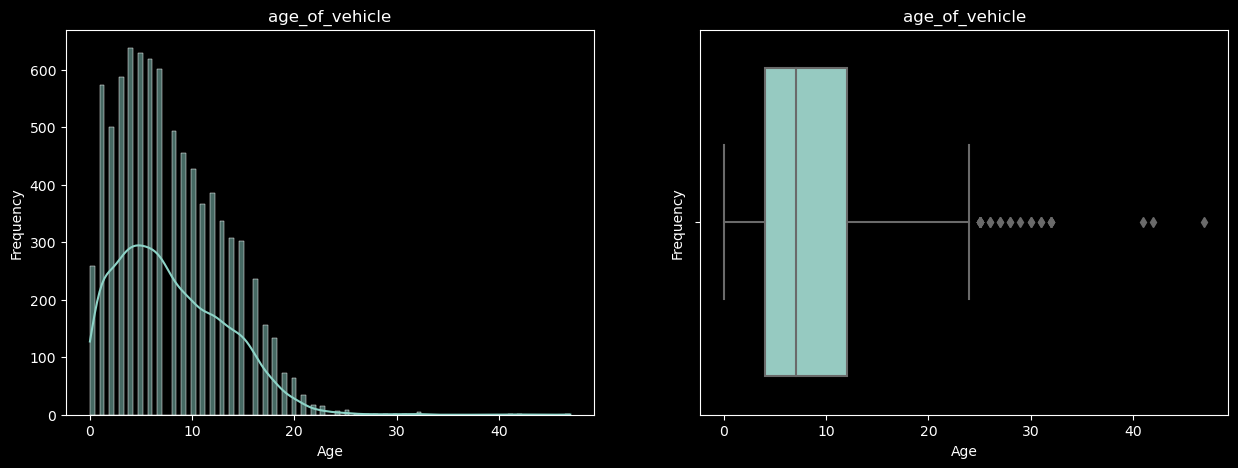

In [38]:
fig = plt.figure(figsize = (15,5))
#Histogram

plt.subplot(1,2,1)
#Define plot object
hist = sns.histplot(trainset.loc[:,'age_of_vehicle'].astype(float),kde=True, bins = 100)
#Setting graph title
hist.set_title( 'age_of_vehicle')
hist.set(xlabel = 'Age', ylabel = 'Frequency')
#Boxplot
plt.subplot(1,2,2)
#Define plot object
box = sns.boxplot(x='age_of_vehicle', data=trainset)
#Setting graph title
box.set_title( 'age_of_vehicle')
box.set(xlabel = 'Age', ylabel = 'Frequency')

#Showing the plot
plt.show()

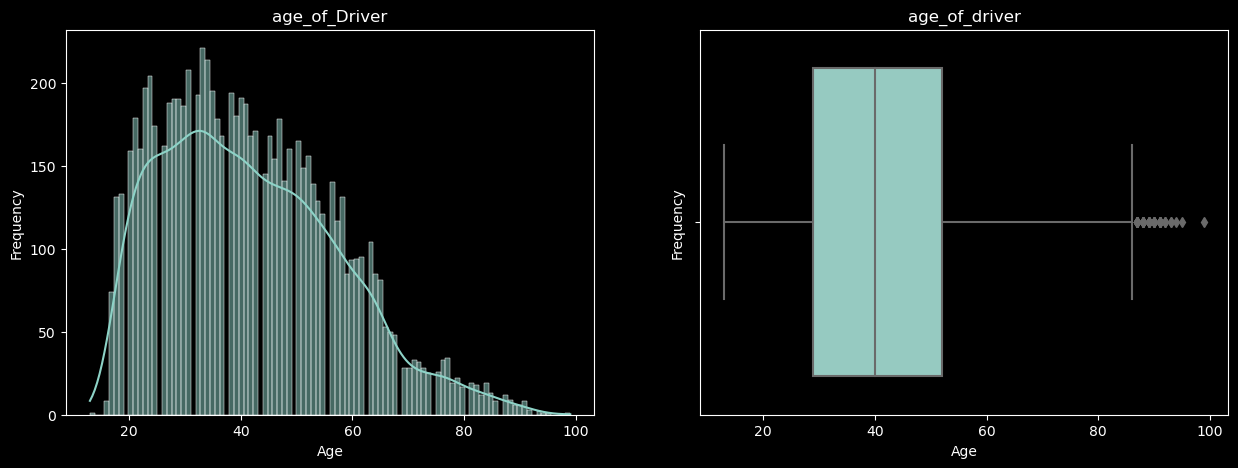

In [39]:
fig = plt.figure(figsize = (15,5))
#Histogram

plt.subplot(1,2,1)
#Define plot object
hist = sns.histplot(trainset.loc[:,'age_of_driver'].astype(float),kde=True, bins = 100)
#Setting graph title
hist.set_title( 'age_of_Driver')
hist.set(xlabel = 'Age', ylabel = 'Frequency')
#Boxplot
plt.subplot(1,2,2)
#Define plot object
box = sns.boxplot(x='age_of_driver', data=trainset)
#Setting graph title
box.set_title( 'age_of_driver')
box.set(xlabel = 'Age', ylabel = 'Frequency')

#Showing the plot
plt.show()

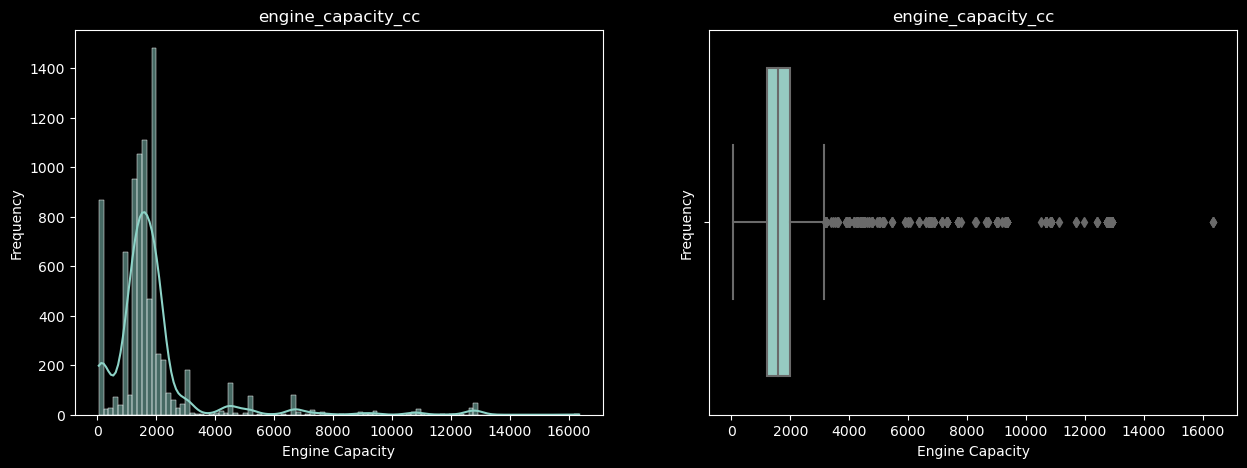

In [40]:
fig = plt.figure(figsize = (15,5))
#Histogram

plt.subplot(1,2,1)
#Define plot object
hist = sns.histplot(trainset.loc[:,'engine_capacity_cc'].astype(float),kde=True, bins = 100)
#Setting graph title
hist.set_title( 'engine_capacity_cc')
hist.set(xlabel = 'Engine Capacity', ylabel = 'Frequency')
#Boxplot
plt.subplot(1,2,2)
#Define plot object
box = sns.boxplot(x='engine_capacity_cc', data=trainset)
#Setting graph title
box.set_title( 'engine_capacity_cc')
box.set(xlabel = 'Engine Capacity', ylabel = 'Frequency')

#Showing the plot
plt.show()

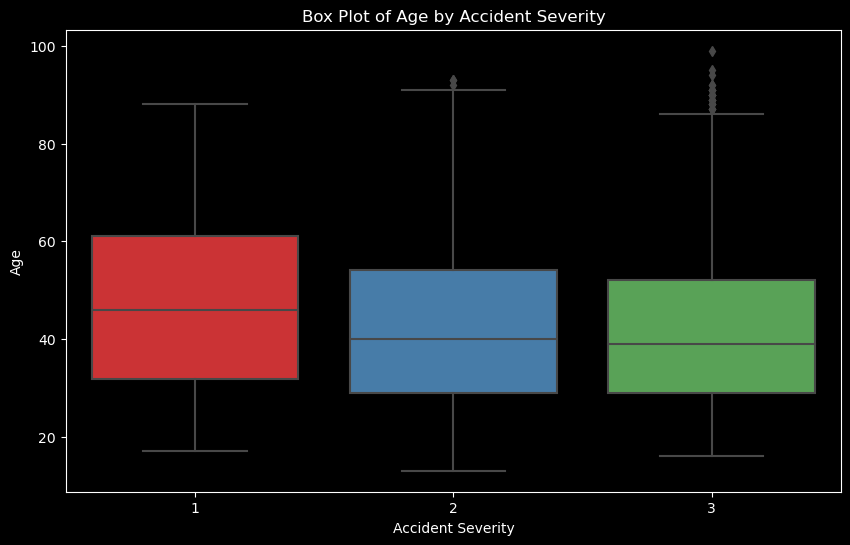

In [41]:
# Create a categorical scatter plot with points colored by 'Accident_Severity'
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accident_severity', y='age_of_driver', data=trainset, palette='Set1')

# Set plot labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Age')
plt.title('Box Plot of Age by Accident Severity')

# Show the plot
plt.show()

when we are looking for how age is related to accident severity,there no significant dfference in median age in three types of severity.But for fatal accidents no of age band is comparitively higher than other two.

In [42]:
trainset.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicl

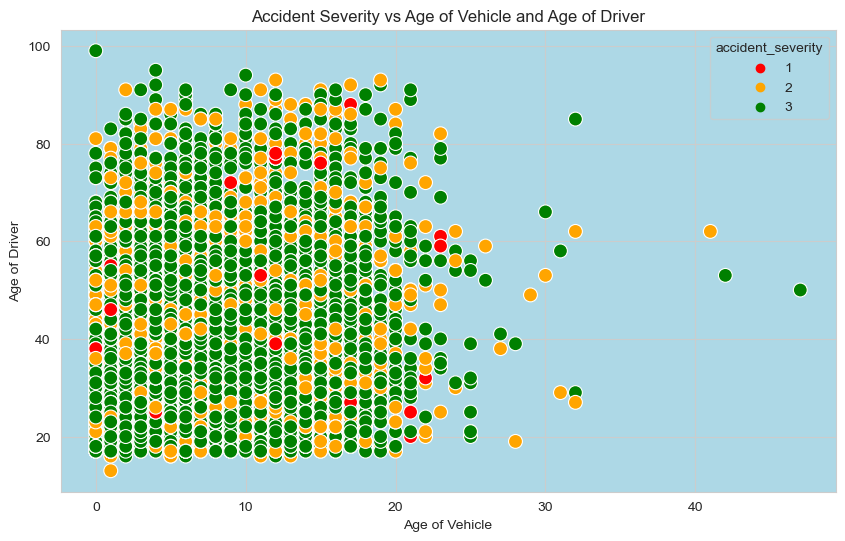

In [43]:
# Set the background color to light blue
sns.set_style("whitegrid", {'axes.facecolor': 'lightblue'})

# Define a custom color palette for different severity levels
custom_palette = ['red', 'orange', 'green']

# Create a scatter plot with color-coded points for different severity levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_of_vehicle', y='age_of_driver', hue='accident_severity', data=trainset, palette=custom_palette,hue_order=[1, 2, 3], s=100)

# Set plot labels and title
plt.xlabel('Age of Vehicle')
plt.ylabel('Age of Driver')
plt.title('Accident Severity vs Age of Vehicle and Age of Driver')

# Show the plot
plt.show()

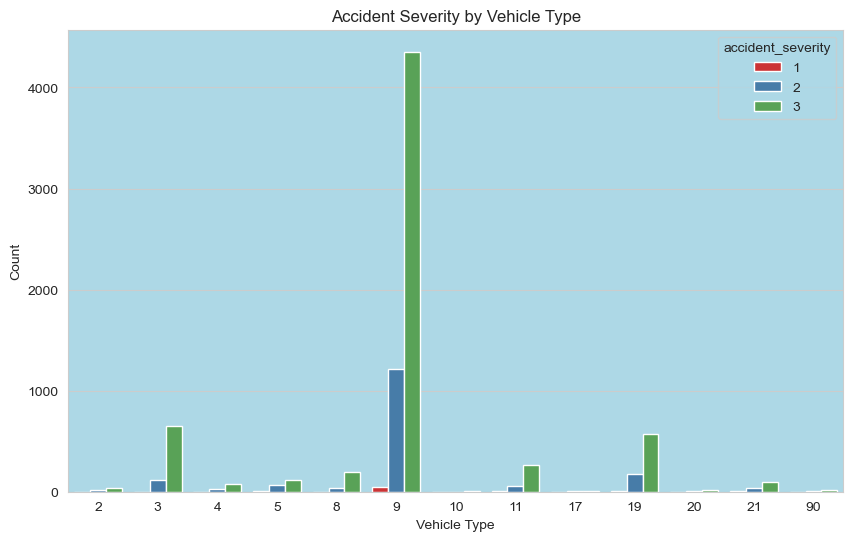

In [44]:
# Set the background color to light blue
sns.set_style("whitegrid", {'axes.facecolor': 'lightblue'})

# Create a count plot for vehicle_type and accident_severity
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_type', hue='accident_severity', data=trainset, palette='Set1')

# Set plot labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Accident Severity by Vehicle Type')

# Show the plot
plt.show()

From this graph it can be seen that for vehicle type 9 that is car, no of mild accident is significantly high  than other type.

Changing the categorical coded values to string category for better interpretation in accident severity  and sex coloumn.

In [45]:
# Define a mapping for coded categories to labels
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Replace coded categories with labels using the map function
trainset['accident_severity'] = trainset['accident_severity'].replace(severity_mapping)

# Now, you can use the updated DataFrame for plotting or analysis
trainset.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
1878,2022010410643,2022,10410643,518752.0,190857.0,-0.286671,51.604041,1,Slight,2,...,1,21,5,125,1,2,HONDA WW125,6,1,E01002125
9325,2022221164894,2022,221164894,363489.0,314010.0,-2.542009,52.722500,22,Serious,2,...,2,27,6,1598,2,5,SEAT ATECA,9,1,E01014102
7000,2022041171604,2022,41171604,354726.0,425274.0,-2.687581,53.721898,4,Slight,1,...,2,21,5,1242,1,8,FIAT 500,3,1,E01025442
4903,2022052200665,2022,52200665,347408.0,386889.0,-2.792001,53.376226,5,Serious,2,...,1,40,7,125,1,3,KTM 125 DUKE,2,1,E01012379
6799,2022501160928,2022,501160928,287694.0,73114.0,-3.586459,50.546973,50,Slight,2,...,1,29,6,2000,2,11,BMW 3 SERIES,6,1,E01020255


In [46]:
# Define a mapping for coded categories to labels
sex_mapping = {1: 'Male', 2: 'Female', 3: 'other'}

# Replace coded categories with labels using the map function
trainset['sex_of_driver'] = trainset['sex_of_driver'].replace(sex_mapping)

# Now, you can use the updated DataFrame for plotting or analysis
trainset.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
1878,2022010410643,2022,10410643,518752.0,190857.0,-0.286671,51.604041,1,Slight,2,...,Male,21,5,125,1,2,HONDA WW125,6,1,E01002125
9325,2022221164894,2022,221164894,363489.0,314010.0,-2.542009,52.722500,22,Serious,2,...,Female,27,6,1598,2,5,SEAT ATECA,9,1,E01014102
7000,2022041171604,2022,41171604,354726.0,425274.0,-2.687581,53.721898,4,Slight,1,...,Female,21,5,1242,1,8,FIAT 500,3,1,E01025442
4903,2022052200665,2022,52200665,347408.0,386889.0,-2.792001,53.376226,5,Serious,2,...,Male,40,7,125,1,3,KTM 125 DUKE,2,1,E01012379
6799,2022501160928,2022,501160928,287694.0,73114.0,-3.586459,50.546973,50,Slight,2,...,Male,29,6,2000,2,11,BMW 3 SERIES,6,1,E01020255


Text(0, 0.5, 'Count')

<Figure size 800x600 with 0 Axes>

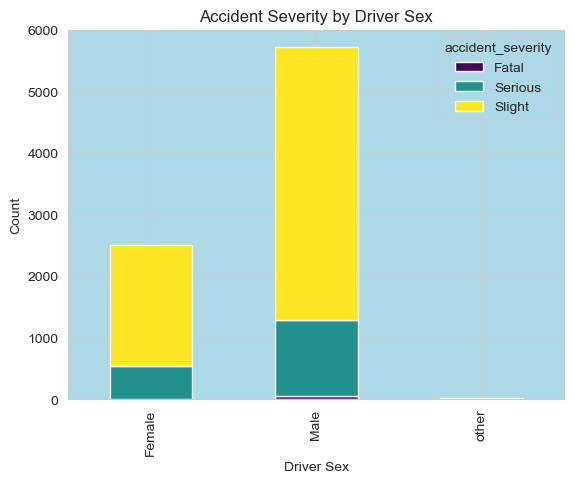

In [47]:
# Count the occurrences of each combination of 'Sex' and 'Severity'
count_data = trainset.groupby(['sex_of_driver', 'accident_severity']).size().reset_index(name='Count')

# Pivot the DataFrame for plotting
pivot_data = count_data.pivot(index='sex_of_driver', columns='accident_severity', values='Count').fillna(0)

# Plot a stacked bar chart
plt.figure(figsize=(8, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Accident Severity by Driver Sex')
plt.xlabel('Driver Sex')
plt.ylabel('Count')

In [48]:
import association_metrics as am

In [49]:
# Selecting only the categorical variables for correlation
# categorical_columns = ['accident_severity', 'vehicle_type', 'towing_and_articulation', 
#                         'vehicle_left_hand_drive', 'sex_of_driver', 'age_band_of_driver',
#                         'propulsion_code', 'generic_make_model']

# df_categorical = merged_df[categorical_columns]

# # Initialize a CamresV object using you pandas.DataFrame
# cramersv = am.CramersV(df_categorical) 
# # will return a pairwise matrix filled with Cramer's V, where columns and index are 
# # the categorical variables of the passed pandas.DataFrame
# cramersv.fit()


# columns_for_correlation = ['accident_severity', 'vehicle_type', 'towing_and_articulation', 
#                          'vehicle_left_hand_drive', 'sex_of_driver', 'age_band_of_driver',
#                          'propulsion_code']

# # Calculate the correlation matrix
# correlation_matrix = merged_df[columns_for_correlation].corr()

# print(correlation_matrix)

# # Plot the correlation matrix using a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

In [50]:
#def heatmap(data):
    #plt.figure(figsize = (36, 27))
    #sns.heatmap(merged_df.corr(), annot = True, cmap = plt.cm.CMRmap_r)
#data_heat = merged_df.drop('accident_severity', axis = 1)
#heatmap(data_heat)


In [51]:
# Creating a heatmap for dummy variables
#sns.heatmap([merged_df['accident_severity', 'vehicle_type', 'vehicle_left_hand_drive','sex_of_driver']], cmap='viridis', annot=True, fmt='d')

#plt.title('Heatmap for Dummy Variables')
#plt.show()

In [52]:
trainset.shape

(8248, 62)

In [53]:
testset.shape

(2063, 62)

In [54]:
#Value count and descriptive statistics both in trainset and testset

In [55]:
# Select only the categorical columns
categorical_columns = trainset.select_dtypes(include=['object', 'category'])

# Iterate over each categorical column and count the values
for column in categorical_columns:
    print("Value counts for column:", column)
    print(trainset[column].value_counts())
    print()

Value counts for column: accident_index
2022451132524    4
2022221239164    4
2022531143167    4
2022010417375    4
2022052200934    4
                ..
2022131181415    1
2022010356825    1
2022302202041    1
202254B054822    1
2022061140945    1
Name: accident_index, Length: 6762, dtype: int64

Value counts for column: accident_reference_x
451132524    4
221239164    4
531143167    4
10417375     4
52200934     4
            ..
131181415    1
10356825     1
302202041    1
54B054822    1
61140945     1
Name: accident_reference_x, Length: 6762, dtype: int64

Value counts for column: accident_severity
Slight     6401
Serious    1771
Fatal        76
Name: accident_severity, dtype: int64

Value counts for column: date
23/03/2022    43
10/02/2022    42
14/01/2022    42
28/01/2022    41
06/12/2022    40
              ..
17/04/2022     7
08/01/2022     7
19/09/2022     7
07/08/2022     6
02/01/2022     5
Name: date, Length: 365, dtype: int64

Value counts for column: time
17:00    84
16:30 

In [56]:
categorical_columns = testset.select_dtypes(include=['object', 'category'])

# Iterate over each categorical column and count the values
for column in categorical_columns:
    print("Value counts for column:", column)
    print(testset[column].value_counts())
    print()

Value counts for column: accident_index
2022231181563    3
2022131219242    2
2022052200224    2
2022221134321    2
2022221247408    2
                ..
2022451241094    1
2022231154536    1
2022010415002    1
2022010373239    1
2022010362933    1
Name: accident_index, Length: 1961, dtype: int64

Value counts for column: accident_reference_x
231181563    3
131219242    2
52200224     2
221134321    2
221247408    2
            ..
451241094    1
231154536    1
10415002     1
10373239     1
10362933     1
Name: accident_reference_x, Length: 1961, dtype: int64

Value counts for column: date
20/06/2022    16
20/05/2022    14
03/11/2022    14
06/12/2022    14
09/11/2022    14
              ..
20/02/2022     1
18/07/2022     1
02/10/2022     1
16/01/2022     1
27/04/2022     1
Name: date, Length: 364, dtype: int64

Value counts for column: time
17:00    19
16:30    18
13:30    17
08:00    16
11:00    15
         ..
19:44     1
12:04     1
02:18     1
23:18     1
12:34     1
Name: time, Leng

# Creating feature dataframe
pulling out the columns of interest from dataframe from main train test dataset

In [57]:
features_df_train = trainset.loc[:,
['accident_index','accident_severity','number_of_vehicles','number_of_casualties','vehicle_reference','vehicle_type','towing_and_articulation','vehicle_manoeuvre','vehicle_left_hand_drive','journey_purpose_of_driver','sex_of_driver','age_of_driver','engine_capacity_cc','propulsion_code','age_of_vehicle','driver_home_area_type','driver_imd_decile']]
#Validating Features dataframe
features_df_train.shape

(8248, 17)

In [58]:
features_df_test = testset.loc[:,
['accident_index','accident_severity','number_of_vehicles','number_of_casualties','vehicle_reference','vehicle_type','towing_and_articulation','vehicle_manoeuvre','vehicle_left_hand_drive','journey_purpose_of_driver','sex_of_driver','age_of_driver','engine_capacity_cc','propulsion_code','age_of_vehicle','driver_home_area_type','driver_imd_decile']]
#Validating Features dataframe
features_df_test.shape

(2063, 17)

In [59]:
#  from sklearn.preprocessing import OneHotEncoder

#  # Convert numerical categories to strings
# features_df_train = features_df_train.astype(str)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')
# cat_coloumns=['vehicle_type','towing_and_articulation', 'journey_purpose_of_driver', 'sex_of_driver','propulsion_code','driver_home_area_type','driver_imd_decile']
# cat_vals=features_df_train[cat_coloumns]
# transformed = encoder.fit_transform(cat_vals)
# transformed
# the names of the new columns


In [60]:
# # # the names of the new columns
# new_col_names = encoder.get_feature_names_out(cat_coloumns)
# #new_col_names = encoder.categories_[0].tolist()[1:]
# new_col_names
 

In [61]:
# # # put the transformed data as columns in the trainset dataframe
# # in the list of new columns, convert numpy array to a list and
# # drop the first column, because we requested "drop='first'"

# for i,new_col_name in enumerate(new_col_names):
# # # put the transformed data as columns in the trainset dataframe
#    features_df_train[new_col_name] = transformed[:,i]
    
# features_df_train.shape

In [62]:
# # delete the original categorical columns
#features_df_train = features_df_train.drop(cat_coloumns, axis=1)

In [63]:
features_df_train.shape

(8248, 17)

In [64]:
features_df_train.columns

Index(['accident_index', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver',
       'age_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_home_area_type', 'driver_imd_decile'],
      dtype='object')

In [65]:
features_df_train.shape

(8248, 17)

In [66]:
features_df_train.columns

Index(['accident_index', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver',
       'age_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_home_area_type', 'driver_imd_decile'],
      dtype='object')

Encoding  for categorical variables in testset

In [67]:
# # Convert numerical categories to strings
# features_df_test = features_df_test.astype(str)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')
# cat_coloumns=['vehicle_type','towing_and_articulation', 'journey_purpose_of_driver', 'sex_of_driver','propulsion_code','driver_home_area_type','driver_imd_decile']
# cat_vals=features_df_test[cat_coloumns]
# transformed = encoder.fit_transform(cat_vals)
# transformed

In [68]:
# # the names of the new columns
# new_col_names = encoder.get_feature_names_out(cat_coloumns)

# #new_col_names = encoder.categories_[0].tolist()[1:]
# # put the transformed data as columns infeatures_df_train the trainset dataframe
# # in the list of new columns, convert numpy array to a list and
# # drop the first column, because we requested "drop='first'"
# for i,new_col_name in enumerate(new_col_names):
# # # put the transformed data as columns in the trainset dataframe
#    features_df_test[new_col_name] = transformed[:,i]
    
# features_df_test.columns


# Outlier  removal

In [70]:
# Define a function to remove outliers from trainset using IQR method
def remove_outliers_iqr(features_df_train, column):
    Q1 = features_df_train[column].quantile(0.25)
    Q3 = features_df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return features_df_train[(features_df_train[column] >= lower_bound) & (features_df_train[column] <= upper_bound)]

# Remove outliers from each numerical column
for column in features_df_train.select_dtypes(include=['int', 'float']):
    features_df_train_final = remove_outliers_iqr(features_df_train, column)

print("DataFrame after removing outliers:")
features_df_train_final.shape


DataFrame after removing outliers:


(8248, 17)

In [71]:
# # Define a function to remove outliers from testset using IQR method
def remove_outliers_iqr(features_df_test, column):
    Q1 = features_df_test[column].quantile(0.25)
    Q3 = features_df_test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return features_df_test[(features_df_test[column] >= lower_bound) & (features_df_test[column] <= upper_bound)]

# Remove outliers from each numerical column
for column in features_df_test.select_dtypes(include=['int', 'float']):
    features_df_test_final = remove_outliers_iqr(features_df_test, column)

print("DataFrame after removing outliers:")
features_df_test_final.shape

DataFrame after removing outliers:


(2063, 17)

# separating predictors and target

In [ ]:
# # separate the target and predictors
# ytrain = trainset["accident_severity"].copy()
# Xtrain = trainset.drop("accident_severity", axis=1)
# ytest = testset["accident_severity"].copy()
# Xtest = testset.drop("accident_severity", axis=1)

In [72]:
features_df_train_final.to_excel("trainset_final.xlsx",index=False)
features_df_test_final.to_excel("testset_final.xlsx",index=False)